#### BackPropagation
Carlos Garcia - 21000475

<img src="./imgs/red.png">

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
x = np.array([[3, 10]], dtype = 'float')
x.shape

(1, 2)

In [3]:
h3 = np.array([
               [-0.23, 0.22, 0.77],
               [0.9, 0.88, -0.4]
            ])


h2 = np.array([
               [-0.3, 0.62, 0.45],
               [0.45, 0.57, 0.48],
               [0.65, 0.58, -0.45]
            ])

h1 = np.array([
               [0.3, 0.46, 0.02],
               [0.22, -0.7, 0.65],
               [0.65, 0.9, 0.34]
            ])

In [4]:
delta_h3 = np.matmul(x, h3)
delta_h2 = np.matmul(delta_h3, h2)
delta_h1 = np.matmul(delta_h2, h1)

In [5]:
layers = [delta_h3, delta_h2, delta_h1]
i = 3
for layer in layers:
    n = np.argmax(layer.flatten())
    print('\nHidden Layer {} ---------------'.format(i))
    print(layer)
    print('Neuron with most error is: {}'.format(n+1))
    i -= 1


Hidden Layer 3 ---------------
[[ 8.31  9.46 -1.69]]
Neuron with most error is: 2

Hidden Layer 2 ---------------
[[0.6655 9.5642 9.0408]]
Neuron with most error is: 2

Hidden Layer 1 ---------------
[[8.180294 1.74791  9.303912]]
Neuron with most error is: 3


### XOR con ANN

##### Forward functions

In [6]:
def append_bias(x):
    return np.hstack((x, np.ones((x.shape[0], 1))))

In [7]:
def relu(x):
    return np.where(x >= 0.0, x, 0.0)    

In [8]:
def initialize_weights(input_features, layers):
    #layers contain the number of layers neurons and is equal to the length of hidden + output layers
    weights = dict()
    bias = 1
    neurons = input_features + bias
    for l in range(1, len(layers) + 1):
        weights['W{}'.format(l)] = np.random.normal(loc = 0, scale = 0.5, size = (neurons, layers[l-1]))
        neurons = layers[l-1] + bias        
        
    return weights  

In [9]:
def getCost(y_hat, y_real):
    return 1/2 * np.mean(np.power(y_hat - y_real, 2))

##### Backpropagation

In [10]:
def relu_prime(x):
    return np.where(x >= 0, 1.0, 0.0) 

In [11]:
def cost_derivative(y_hat, y):
    #Remember y_hat is just the output activation of a layer
    return y_hat - y

##### Network definition

In [12]:
def forward_propagation(X, weights):   
    layer = append_bias(X)
    L = len(weights.keys()) #total number of layers
    
    #Cached results
    zs = []
    activations = [layer]
    
    for l in range(1, L + 1):
        Z = np.matmul(layer, weights['W{}'.format(l)])
        if l < L:
            A = relu(Z)
            Z = append_bias(Z)
            A = append_bias(A)
        else:
            A = Z * 1
        
        zs.append(Z)
        activations.append(A)
        layer = A
        
    return zs, activations

In [13]:
def backward_propagation(zs, activations, y, W):
    nabla_w = [np.zeros(w.shape) for w in list(W.values())]
    delta = cost_derivative(activations[-1], y) * relu_prime(zs[-1])
    nabla_w[-1] = np.matmul(activations[-2].T, delta)
    for l in range(len(zs)-1, 0, -1):
        delta = delta[:, :-1] if l < len(zs)-1 else delta
        act = activations[l-1]
        delta = np.matmul(delta, W['W{}'.format(l+1)].T) * relu_prime(zs[l-1])
        nabla_w[l-1] = np.matmul(act.T, delta[:, :-1])

    return nabla_w

In [14]:
def train_network(X, Y, epochs, lr): 
    costs = []
    weights = initialize_weights(X.shape[1], [4,2,1])
    for epoch in range(1, epochs + 1):
        zs, activations = forward_propagation(X, weights)
        costs.append(getCost(activations[-1], Y)) 
        nabla_w = backward_propagation(zs, activations, y, weights)
        for i in range(1, 4):
            weights['W{}'.format(i)] = weights['W{}'.format(i)] - (lr * nabla_w[i - 1])
        
    return weights, activations, costs

##### Run Model

In [15]:
def printResults(costs, activations, i):
    colours = ListedColormap(['r','b'])
    h2_activations = activations[2][:,:2]
    classes = ["0","1"]
    
    #costs
    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10,3))
    ax[0].plot(np.arange(1, len(costs)+1), costs, 'bo--', linewidth=2, markersize=5)
    ax[0].set_title('Cost graph')
    
    #activations
    ax[1].scatter(h2_activations[:,0], h2_activations[:, 1], c = list(y.flatten()), cmap = colours)
    ax[1].set_title('H2 layer activations')
    
    fig.suptitle('Experiment {} - Results'.format(i))
    plt.grid(True)
    plt.show()
    
    return

In [16]:
x = np.array([[1, 1],[1, 0],[0, 1],[0, 0]], dtype = 'float')
y = np.array([0,1,1,0]).reshape(4,1)

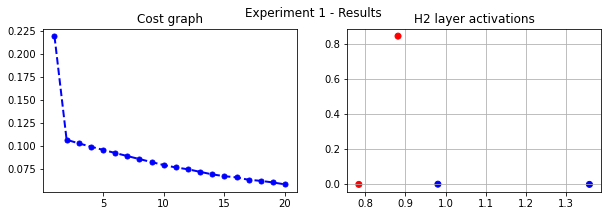

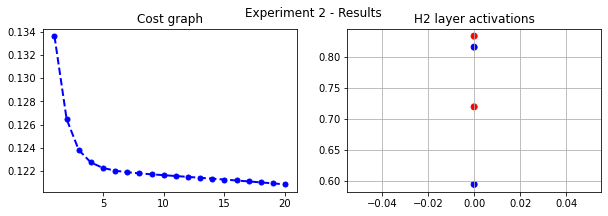

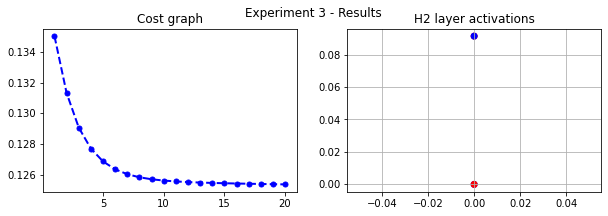

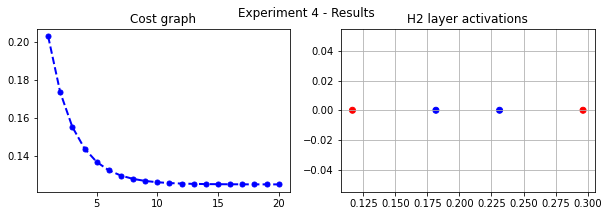

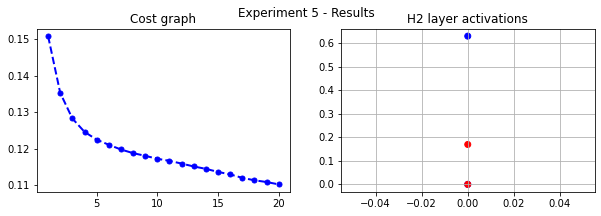

In [32]:
for i in range(1, 6):
    model_params, activations, costs = train_network(x, y, 20, 0.05)
    printResults(costs, activations, i)
    print('\n')

### Conclusiones
- De acuerdo a la inicializacion de los parametros es posible que en algunos casos la representación generada por la funciones de activación no logren transformar el espacio de una manera óptima para hacerlos linealmente separables
- Podemos ver como la representación intermedia muestra un espacio transformado del espacio original proporcionada en la entrada de la red